<a href="https://colab.research.google.com/github/valentinamgavirira/analitica-/blob/main/Reto3analitica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

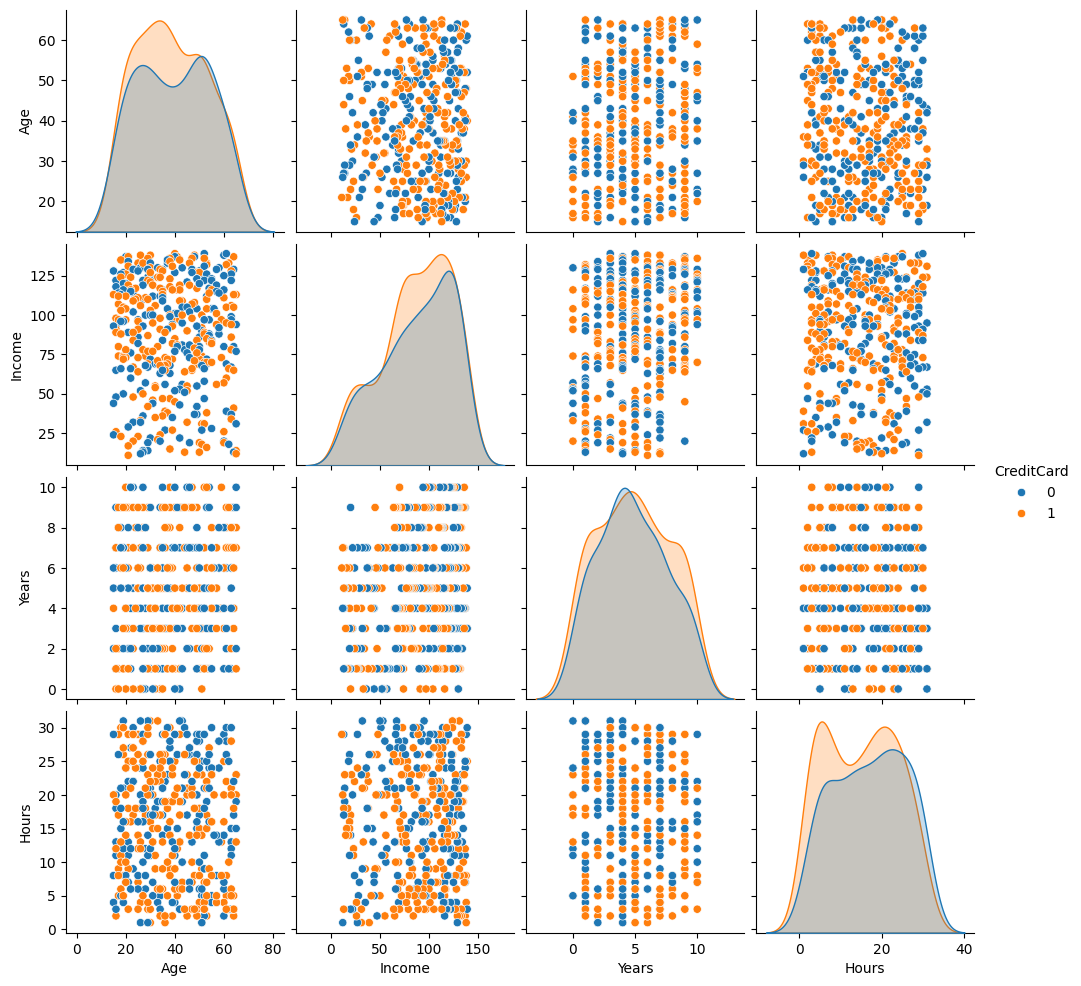

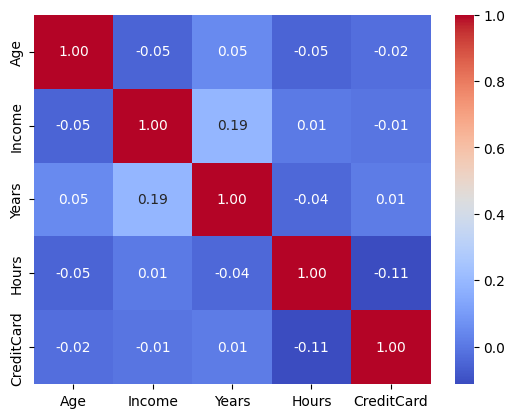

In [ ]:
# Cargar la base de datos
file_path = "/content/3. BD2_In_App_Pur_L_Int.xlsx"
XDB = pd.read_excel(file_path, sheet_name=0)  # Hoja principal

# Seleccionar variables de entrada y salida
XDB = XDB[["Age", "Income", "Years", "Hours", "CreditCard"]]
XDB.dropna(inplace=True)

Xd = np.array(XDB.iloc[:, 0:4])  # Variables de entrada
yd = np.array(XDB.iloc[:, 4])    # Variable explicativa

# Gráficos de correlación
sns.pairplot(XDB, hue="CreditCard", diag_kind='kde')
plt.show()

sns.heatmap(XDB.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

,Age,Income,Years,Hours
0,49.929577,94.295775,5.267606,15.197183
1,40.417910,28.253731,3.791045,14.641791
2,24.979381,117.597938,5.164948,16.432990
3,51.030769,126.153846,5.323077,15.369231
4,36.690000,69.260000,4.630000,17.110000


los cluster a los que pertenecen las personas son:
 [3 2 3 3 2 2 2 3 2 3 3 3 2 3 2 2 2 2 2 3 3 2 2 2 2 3 2 3 3 3 2 3 2 2 3 2 3
 2 2 3 2 0 0 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 0 0 0 4 0 4 0 4 0 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 3 3 2 2 3 3 3 3 3 3 2 3 2 3 3 2 2 3 3 2 3 2 3 3 2 3 2 2 3 3 2 3 2
 2 3 2 2 3 3 3 2 2 2 3 3 3 2 2 2 3 3 3 3 2 3 3 2 2 3 3 2 2 3 2 3 2 2 3 3 2
 2 2 2 2 2 3 3 2 2 3 2 3 2 2 3 3 2 3 2 2 3 2 2 2 2 2 2 2 2 0 2 0 0 2 2 2 0
 0 0 0 0 2 2 2 0 0 0 0 2 0 0 2 0 0 2 0 0 0 2 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0
 4 0 4 0 4 4 0 0 4 0 4 0 0 0 0 0 0 4 0 4 0 4 0 4 4 0 0 4 4 0 4 0 4 4 0 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


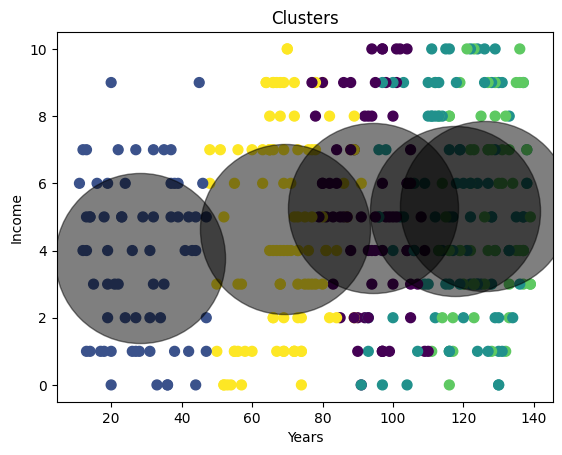

In [ ]:
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Numero de Clusters (del 1 al 5 siendo 1 muy bajo y 5 muy alto)
mkm=KMeans(n_clusters=NC,init='random',random_state=42)
mkm.fit(Xd,yd)

#Cuales son los graficos creados
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=['Age','Income', 'Years','Hours']
dfc.index=['0','1','2','3','4']
display(dfc)

#A que sucursal o cluster pertenece una persona
ydc=mkm.predict(Xd)
print("los cluster a los que pertenecen las personas son:\n",ydc)

#Se procede con la carga de los clusters
centroids=mkm.cluster_centers_
plt.figure()
plt.scatter(Xd[:,1],Xd[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(centroids[:,1],centroids[:,2],c='black',s=15000,alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Income')
plt.title('Clusters')
plt.show()


In [ ]:
# Determinar cuál de las variables de entrada presenta una mayor diferenciación en la preaprobación de créditos
correlation_credit = XDB.corr()["CreditCard"].abs().sort_values(ascending=False)
print("Correlación de variables con la preaprobación de crédito:")
print(correlation_credit)

# Aplicar K-Means con número fijo de clusters
NC = 5  # Número predefinido de clusters
mkm = KMeans(n_clusters=NC, init='k-means++', random_state=42)
mkm.fit(Xd)

# Asignar clusters a los datos
XDB["Cluster"] = mkm.labels_
XDB

Correlación de variables con la preaprobación de crédito:
CreditCard    1.000000
Hours         0.113680
Age           0.024715
Years         0.012473
Income        0.008782
Name: CreditCard, dtype: float64


,Age,Income,Years,Hours,CreditCard,Cluster
0,40,139,3,25,1,1
1,26,138,7,4,1,1
2,48,138,7,8,1,1
3,60,138,6,29,0,1
4,21,137,5,21,0,1
...,...,...,...,...,...,...
395,36,65,8,2,1,4
396,64,65,7,18,1,3
397,35,65,7,21,0,4
398,25,64,9,3,1,4


In [ ]:
# Cluster con mayor cantidad de datos y mayor % de aprobación
cluster_counts = XDB["Cluster"].value_counts()
approval_rates = XDB.groupby("Cluster")["CreditCard"].mean()
max_count_cluster = cluster_counts.idxmax()
max_approval_cluster = approval_rates.idxmax()
print("Cluster con mayor cantidad de datos:", max_count_cluster)
print("Cluster con mayor % de aprobación:", max_approval_cluster)

ND=np.bincount(ydc)
#Número de personas aprobadas por sucursal o cluster
NApr=XDB.groupby('Cluster').agg({'CreditCard':lambda x: (x==1).sum()})
NAprp=np.array(NApr)/ND[:,None]
Nneg=XDB.groupby('Cluster').agg({'CreditCard':lambda x: (x==0).sum()})
Nnegp=np.array(Nneg)/ND[:,None]

df2=pd.DataFrame(np.column_stack((ND,NApr,Nneg,NAprp,Nnegp)))
df2.columns=['ND','NApr','Nneg','%Apr','%Neg']
display(df2)

Cluster con mayor cantidad de datos: 1
Cluster con mayor % de aprobación: 4


,ND,NApr,Nneg,%Apr,%Neg
0,71.0,32.0,29.0,0.450704,0.408451
1,67.0,62.0,53.0,0.925373,0.791045
2,97.0,37.0,36.0,0.381443,0.371134
3,65.0,43.0,40.0,0.661538,0.615385
4,100.0,39.0,29.0,0.390000,0.290000


In [ ]:
# Evaluación del modelo

ydp=np.zeros((len(ydc),1))

for k in range(len(ydp)):
  print('La persona:',k)
  print('pertenece al cluster',ydc[k])
  ncl=ydc[k]
  print('El porcentaje de negación es:',(Nnegp[ncl]*100))
  print('El porcentaje de aprobación es:',(NAprp[ncl]*100))
  if NAprp[ncl]>Nnegp[ncl]:
    print('Se aprueba')
    ydp[k]=1
  else:
    print('Se niega')
    ydp[k]=0

XDB['Pronóstico']=ydp
XDB.to_excel('InformeCluster.xlsx')

La persona: 0
pertenece al cluster 3
El porcentaje de negación es: [61.53846154]
El porcentaje de aprobación es: [66.15384615]
Se aprueba
La persona: 1
pertenece al cluster 2
El porcentaje de negación es: [37.11340206]
El porcentaje de aprobación es: [38.1443299]
Se aprueba
La persona: 2
pertenece al cluster 3
El porcentaje de negación es: [61.53846154]
El porcentaje de aprobación es: [66.15384615]
Se aprueba
La persona: 3
pertenece al cluster 3
El porcentaje de negación es: [61.53846154]
El porcentaje de aprobación es: [66.15384615]
Se aprueba
La persona: 4
pertenece al cluster 2
El porcentaje de negación es: [37.11340206]
El porcentaje de aprobación es: [38.1443299]
Se aprueba
La persona: 5
pertenece al cluster 2
El porcentaje de negación es: [37.11340206]
El porcentaje de aprobación es: [38.1443299]
Se aprueba
La persona: 6
pertenece al cluster 2
El porcentaje de negación es: [37.11340206]
El porcentaje de aprobación es: [38.1443299]
Se aprueba
La persona: 7
pertenece al cluster 3
E

In [ ]:
# Determinar las variables de entrada que poseen una mayor correlación entre ellas
correlation_matrix = XDB.iloc[:, :-1].corr()
print("Matriz de correlación entre variables de entrada:")
print(correlation_matrix)

Matriz de correlación entre variables de entrada:
                 Age    Income     Years     Hours  CreditCard   Cluster
Age         1.000000 -0.050346  0.051367 -0.050889   -0.024715 -0.062708
Income     -0.050346  1.000000  0.187323  0.006742   -0.008782 -0.025357
Years       0.051367  0.187323  1.000000 -0.044012    0.012473  0.050634
Hours      -0.050889  0.006742 -0.044012  1.000000   -0.113680  0.030142
CreditCard -0.024715 -0.008782  0.012473 -0.113680    1.000000  0.017205
Cluster    -0.062708 -0.025357  0.050634  0.030142    0.017205  1.000000


In [ ]:
# Identificar cluster con mayor edad, ingresos, menor años, mayor horas
dfc = pd.DataFrame(mkm.cluster_centers_, columns=["Age", "Income", "Years", "Hours"])
max_age_cluster = dfc["Age"].idxmax()
max_income_cluster = dfc["Income"].idxmax()
min_years_cluster = dfc["Years"].idxmin()
max_hours_cluster = dfc["Hours"].idxmax()
print("Cluster con mayor edad:", max_age_cluster)
print("Cluster con mayor ingresos:", max_income_cluster)
print("Cluster con menor años:", min_years_cluster)
print("Cluster con mayor horas:", max_hours_cluster)

Cluster con mayor edad: 3
Cluster con mayor ingresos: 1
Cluster con menor años: 0
Cluster con mayor horas: 2


In [ ]:
# Pronóstico para la Hoja 2
XDB_pred = pd.read_excel(file_path, sheet_name=1)
XDB_pred = XDB_pred[["Age", "Income", "Years", "Hours"]]
XDB_pred.dropna(inplace=True)
Xd_pred = np.array(XDB_pred)
XDB_pred["Cluster"] = mkm.predict(Xd_pred)
print("Pronóstico para los datos de la Hoja 2:")
print(XDB_pred)

Pronóstico para los datos de la Hoja 2:
   Age  Income  Years  Hours  Cluster
0   21     128      3     22        1
1   50     128      1      6        1


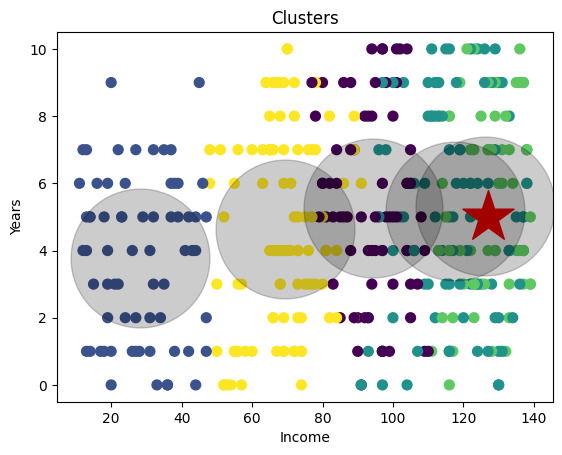

In [ ]:
XDN = np.array([40, 127, 5, 4])
ydn=mkm.predict(XDN.reshape(1,-1))

plt.figure()
plt.scatter(Xd[:,1],Xd[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(XDN[1],XDN[2],marker='*',s=1500,facecolors='red')
plt.scatter(centroids[:,1],centroids[:,2],c='black',s=10000,alpha=0.2)
plt.xlabel('Income')
plt.ylabel('Years')
plt.title('Clusters')
plt.show()

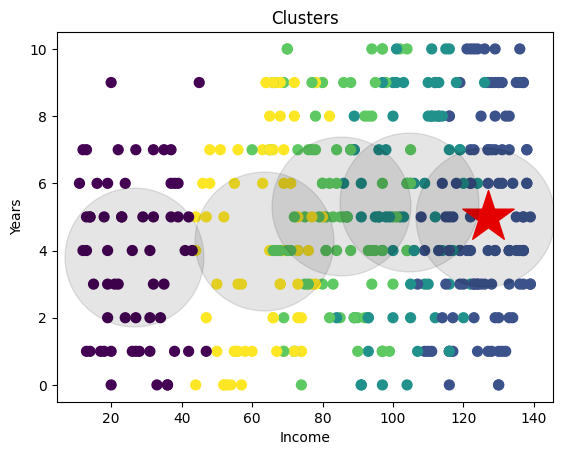

In [ ]:
# Visualización de clusters
plt.figure()
plt.scatter(Xd[:, 1], Xd[:, 2], c=mkm.labels_, s=50, cmap="viridis")
plt.scatter(new_person[0, 1], new_person[0, 2], marker="*", s=1500, facecolors="red")
plt.scatter(mkm.cluster_centers_[:, 1], mkm.cluster_centers_[:, 2], c="black", s=10000, alpha=0.1)
plt.xlabel("Income")
plt.ylabel("Years")
plt.title("Clusters")
plt.show()

In [ ]:
print("Total de solicitudes:", XDB.shape[0])

Total de solicitudes: 400


In [ ]:
total_solicitudes = XDB.shape[0]
aprobadas = (XDB["CreditCard"] == 1).sum()
negadas = (XDB["CreditCard"] == 0).sum()

print(f"Total de solicitudes: {total_solicitudes}")
print(f"Solicitudes aprobadas: {aprobadas}")
print(f"Solicitudes negadas: {negadas}")

Total de solicitudes: 400
Solicitudes aprobadas: 213
Solicitudes negadas: 187


In [ ]:
cm=confusion_matrix(yd,ydp) #ypd es aprobación o negación. ypc es el cluster de pertenencia

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=((VN+VP)/(VN+VP+FN+FP))*100
print("- La exactitud del modelo es del:",Ex)

TE=((FN+FP)/(VN+VP+FN+FP))*100
print("- La tasa de error del modelo es del;",TE)

Sen=(VP/(VP+FN))*100
print("- La sensibilidad del modelo es del:",Sen)

Esp=(VN/(VN+FP))*100
print("- La especificidad del modelo es del:",Esp)

Pre=(VP/(VP+FP))*100
print("- La precisión del modelo es del:",Pre)

Pren=(VN/(VN+FN))*100
print("- La precisión negativa del modelo es del:",Pren)

- La exactitud del modelo es del: 53.25
- La tasa de error del modelo es del; 46.75
- La sensibilidad del modelo es del: 100.0
- La especificidad del modelo es del: 0.0
- La precisión del modelo es del: 53.25
- La precisión negativa del modelo es del: nan


<ipython-input-92-4e3257af08a4>:20: RuntimeWarning: invalid value encountered in scalar divide
  Pren=(VN/(VN+FN))*100


analisis de resultados: para este estudio de creditos frente a la preaprobacion se tomaron un total de 400 solicitudes de los cuales 213 fueron aprobados y 187 son negados. Se consideraron cuatro variables socioeconómicas para la caracterización del proceso de preaprobación: Edad, Ingresos, Años de Experiencia y Horas de Trabajo. para el modelo utilisado para esta caracterizacion fue el modelo de agrupacion kmeans. La mayor correlación entre variables se encontró entre Ingresos y Años de Experiencia, con un 18.7% de relación. Por otro lado la mayor correlación con la variable explicativa fue la variable Hours (11%). A partir del modelo K-Means, se identificaron 5 grupos principales dentro de los datos. Estos clusters pueden caracterizarse de la siguiente manera: Mayor Edad: 3 (51), Mayores Ingresos: 3 (126), Menor Cantidad de Años: 1 (3.79), Mayor Cantidad de Horas: 4 (17), Mayor Cantidad de Datos: 4 (100) Y Mayor Porcentaje de Aprobación: 4 (57%).